# Predicting customer subscription

Coding and Review Exercise

## Import packages

In [432]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

import math
import numpy as np

import warnings

## Data acquisition & processing

Reading data from xlsx files and perform some exploratory data analysis

In [2]:
# ################################################
#
#  .______       _______     ___       _______  
#  |   _  \     |   ____|   /   \     |       \ 
#  |  |_)  |    |  |__     /  ^  \    |  .--.  |
#  |      /     |   __|   /  /_\  \   |  |  |  |
#  |  |\  \----.|  |____ /  _____  \  |  '--'  |
#  | _| `._____||_______/__/     \__\ |_______/ 
#                                               
#
#  read
# ###############################################

# read data from excel (only 1 sheet)
dat_train_raw = pd.read_excel('train_file.xlsx', header=0)
dat_test_raw = pd.read_excel('test_file.xlsx', header=0)

### Description of data

In [3]:
rows, cols = dat_train_raw.shape
print("Train dataset")
print(f" rows: {rows}")
print(f" cols: {cols}")

Train dataset
 rows: 32910
 cols: 15


In [4]:
rows, cols = dat_test_raw.shape
print("Test dataset")
print(f" rows: {rows}")
print(f" cols: {cols}")

Test dataset
 rows: 40
 cols: 14


In [5]:
# list of columns
print("Columns: ", list(dat_train_raw.columns))

Columns:  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'y']


In [6]:
dat_train_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


In [7]:
dat_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32910 non-null  int64 
 1   job          32910 non-null  object
 2   marital      32910 non-null  object
 3   education    32910 non-null  object
 4   default      32910 non-null  object
 5   housing      32910 non-null  object
 6   loan         32910 non-null  object
 7   contact      32910 non-null  object
 8   month        32910 non-null  object
 9   day_of_week  32910 non-null  object
 10  duration     32910 non-null  int64 
 11  campaign     32910 non-null  int64 
 12  previous     32910 non-null  int64 
 13  poutcome     32910 non-null  object
 14  y            32910 non-null  object
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


In [8]:
dat_train_raw.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
dat_train_raw.describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


Correlation of non-categorical features

In [10]:
dat_train_raw.corr()

,age,duration,campaign,previous
age,1.000000,-0.001741,0.003406,0.020794
duration,-0.001741,1.000000,-0.075651,0.022585
campaign,0.003406,-0.075651,1.000000,-0.078974
previous,0.020794,0.022585,-0.078974,1.000000


### Histogram describing the distribution of values with each column

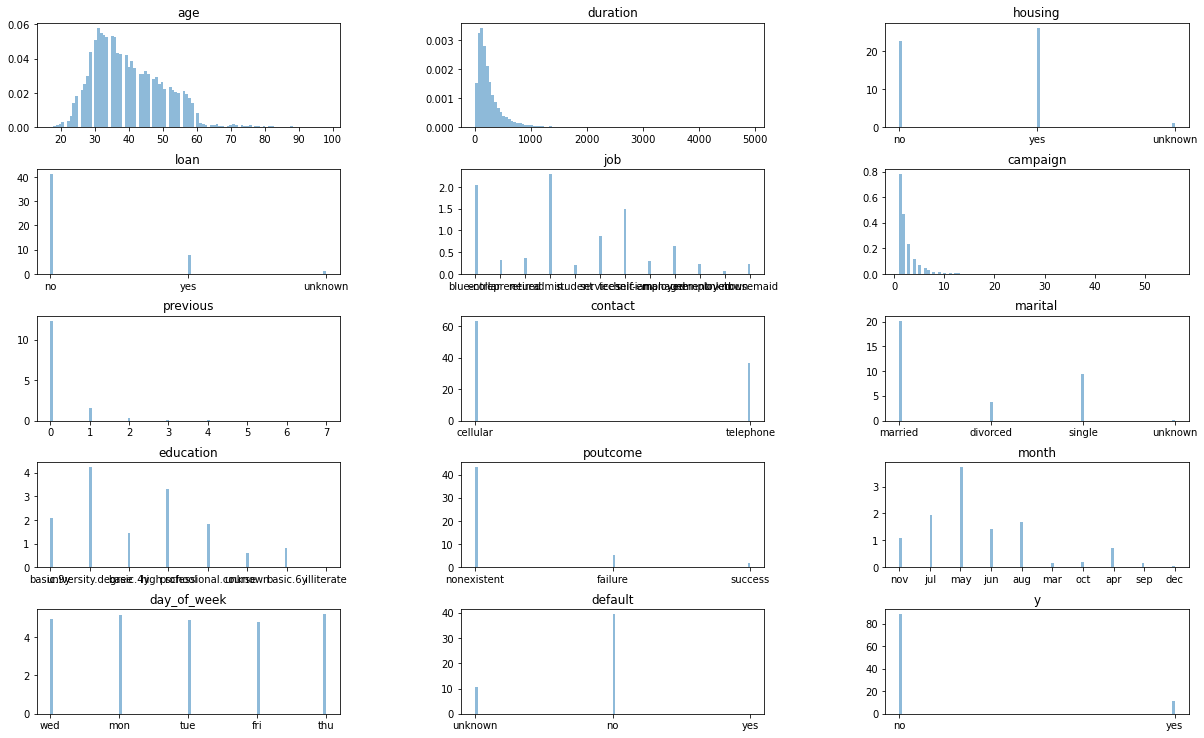

In [11]:
# ############################################
#
#   __    __   __       _______.___________.
#  |  |  |  | |  |     /       |           |
#  |  |__|  | |  |    |   (----`---|  |----`
#  |   __   | |  |     \   \       |  |     
#  |  |  |  | |  | .----)   |      |  |     
#  |__|  |__| |__| |_______/       |__|     
#                                           
#
#  hist
# ###########################################
ncols = 3
nrows = 5

fig, ax = plt.subplots(nrows= nrows, ncols=ncols, figsize=(20, 12), squeeze = False, sharey = False, sharex = False, gridspec_kw=dict(left=0.1, right=0.9, bottom=0.1, top=0.9))
for i, col in enumerate(dat_train_raw.columns):
    axi = ax[i % nrows][i % ncols]
    axi.hist(dat_train_raw.loc[:, col], alpha=0.5, bins=100, density=True)
    #ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(col),)
    axi.set_title(col)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# plt.yscale('log')

### Auxiliary functions

In [3]:
# ###############################################
#
#    __                  _   _                 
#   / _|                | | (_)                
#  | |_ _   _ _ __   ___| |_ _  ___  _ __  ___ 
#  |  _| | | | '_ \ / __| __| |/ _ \| '_ \/ __|
#  | | | |_| | | | | (__| |_| | (_) | | | \__ \
#  |_|  \__,_|_| |_|\___|\__|_|\___/|_| |_|___/
#                                              
#                                              
#
#  functions
# ##############################################

def process_dat(dat, keep = [], categorical = [], remove_cols = [], output_col = None):
    """
    Reliable method to process all data
    """
    # ###############################################################
    #
    #  ____    ____  _______       ___   .___________.    ___      
    #  \   \  /   / |       \     /   \  |           |   /   \     
    #   \   \/   /  |  .--.  |   /  ^  \ `---|  |----`  /  ^  \    
    #    \_    _/   |  |  |  |  /  /_\  \    |  |      /  /_\  \   
    #      |  |     |  '--'  | /  _____  \   |  |     /  _____  \  
    #      |__|     |_______/ /__/     \__\  |__|    /__/     \__\ 
    #                                                              
    #
    #  ydata
    # ##############################################################

    if output_col is None:
        print("warning: output_col must be defined")
        new_dat_y = None
    elif output_col not in dat.columns:
        print("warning: output_col not in data")
        new_dat_y = None
    else:
        new_dat_y = dat.copy()
        new_dat_y = new_dat_y.loc[:, [output_col]]
        new_dat_y = new_dat_y[output_col].replace({'yes': 1, 'no': 0})

    # ############################################################
    #
    #  ___   ___  _______       ___   .___________.    ___      
    #  \  \ /  / |       \     /   \  |           |   /   \     
    #   \  V  /  |  .--.  |   /  ^  \ `---|  |----`  /  ^  \    
    #    >   <   |  |  |  |  /  /_\  \    |  |      /  /_\  \   
    #   /  .  \  |  '--'  | /  _____  \   |  |     /  _____  \  
    #  /__/ \__\ |_______/ /__/     \__\  |__|    /__/     \__\ 
    #                                                           
    #
    #  xdata
    # ###########################################################
    
    new_dat_x = dat.copy()
    if keep is not None and isinstance(keep, list) and len(keep) > 0:
        # keep only cols
        new_dat_x = new_dat_x.loc[:, keep]
        # filter columns in categorical arg so there's no error later in the code

    categorical = [col for col in categorical if col in new_dat_x.columns]
    remove_cols = [col for col in remove_cols if col in new_dat_x.columns]
    
    # remove output variable
    if output_col in new_dat_x.columns:
        new_dat_x.drop([output_col], axis = 1, inplace = True)
    
    # ##############################################
    #
    #        _                              _     
    #       | |                            | |    
    #    ___| | ___  __ _ _ __     ___ ___ | |___ 
    #   / __| |/ _ \/ _` | '_ \   / __/ _ \| / __|
    #  | (__| |  __/ (_| | | | | | (_| (_) | \__ \
    #   \___|_|\___|\__,_|_| |_|  \___\___/|_|___/
    #                                             
    #                                             
    #
    #  clean cols
    # #############################################
    
    if remove_cols is not None and isinstance(remove_cols, list) and len(remove_cols) > 0:
        new_dat_x.drop(remove_cols, axis = 1, inplace = True)
       
    # ###################################################
    #
    #             _                        _           
    #            | |                      (_)          
    #    ___ __ _| |_ ___  __ _  ___  _ __ _  ___  ___ 
    #   / __/ _` | __/ _ \/ _` |/ _ \| '__| |/ _ \/ __|
    #  | (_| (_| | ||  __/ (_| | (_) | |  | |  __/\__ \
    #   \___\__,_|\__\___|\__, |\___/|_|  |_|\___||___/
    #                      __/ |                       
    #                     |___/                        
    #
    #  categories
    # ##################################################
    
    # create dummies to convert string to categories
    if categorical is not None and isinstance(categorical, list) and len(categorical) > 0:
        new_dat_x = pd.get_dummies(new_dat_x, columns = categorical)

        # remove unknown
        new_dat_x.drop([col for col in new_dat_x.columns if col.endswith('_unknown')], axis=1, inplace = True)
    
    return new_dat_x, new_dat_y

def keep_cols(xdata, keep = []):
    """
    Auxiliary function to keep only selected columns (all if it's an empty list)
    """
    if keep is not None and isinstance(keep, list) and len(keep) > 0:
        xtrain = xdata.copy()
        ix = []
        for col_keep in keep:
            [ix.append(col) for col in xtrain.columns if col.startswith(col_keep)]
        return xtrain.loc[:, ix]
    return xdata

def fit_model(xdata, ydata, model, keep = []):
    """
    Fit model and calculate precision/recall
    """
    xtrain = keep_cols(xdata, keep)
    ytrain = ydata.copy()
    
    fitted = model.fit(xtrain, ytrain)
    warn = None
    pred = fitted.predict(xtrain)
    if sum(pred) == 0 or sum(pred) == len(pred):
        warn = "warning:: all predictions are the same"
    
    with warnings.catch_warnings(record=True) as w:
        precision = precision_score(ytrain, pred)
        
    
    with warnings.catch_warnings(record=True) as w:
        recall = recall_score(ytrain, pred)
    
    return {'precision': precision, 'recall': recall, 'fitted': fitted, 'keep': keep, 'warning': warn}

def predict_test(dat, keep, cats, cols_to_rm, output_col, model):
    """
    Predict on a test set
    """
    xtest, ytest = process_dat(dat, keep, cats, cols_to_rm, 'y')
    
    pred = model.predict(xtest)
    if sum(pred) == 0 or sum(pred) == len(pred):
        warn = "warning:: all predictions are the same"
    
    with warnings.catch_warnings(record=True) as w:
        precision = precision_score(ytrain, pred)
        
    
    with warnings.catch_warnings(record=True) as w:
        recall = recall_score(ytrain, pred)
    
    return {'precision': precision, 'recall': recall, 'fitted': fitted, 'keep': keep, 'warning': warn}

### Initial data cleanup and processing

In [4]:
# #####################################
#
#         _ _       _       _        
#        | | |     | |     | |       
#    __ _| | |   __| | __ _| |_ __ _ 
#   / _` | | |  / _` |/ _` | __/ _` |
#  | (_| | | | | (_| | (_| | || (_| |
#   \__,_|_|_|  \__,_|\__,_|\__\__,_|
#                                    
#                                    
#
#  all data
# ####################################
keep = []
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'contact', 'month', 'day_of_week', 'campaign']

xtrain_raw, ytrain_raw = process_dat(dat_train_raw, keep, cats, [], 'y')
xtest_raw, ytest_raw = process_dat(dat_test_raw, keep, cats, [], 'y')

### Describe data using univariate analysis (LogisticRegression)

In [14]:
# ##################################################
#
#               _                 _       _       
#              (_)               (_)     | |      
#   _   _ _ __  ___   ____ _ _ __ _  __ _| |_ ___ 
#  | | | | '_ \| \ \ / / _` | '__| |/ _` | __/ _ \
#  | |_| | | | | |\ V / (_| | |  | | (_| | ||  __/
#   \__,_|_| |_|_| \_/ \__,_|_|  |_|\__,_|\__\___|
#                                                 
#                                                 
#
#  univariate
# #################################################

model1 = LogisticRegressionCV(solver='lbfgs',random_state= 2022, max_iter = 1e6)
res = [fit_model(xtrain_raw, ytrain_raw, model1, keep = [col]) for col in dat_train_raw.columns.drop('y')]
pd.DataFrame(res)

,precision,recall,fitted,keep,warning
0,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[age],warning:: all predictions are the same
1,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[job],warning:: all predictions are the same
2,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[marital],warning:: all predictions are the same
3,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[education],warning:: all predictions are the same
4,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[default],warning:: all predictions are the same
5,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[housing],warning:: all predictions are the same
6,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[loan],warning:: all predictions are the same
7,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[contact],warning:: all predictions are the same
8,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[month],warning:: all predictions are the same
9,0.000000,0.000000,"LogisticRegressionCV(max_iter=1000000.0, rando...",[day_of_week],warning:: all predictions are the same


## Manual feature selection

In [235]:
# ##################################################
#
#   _______       ___   .___________.    ___      
#  |       \     /   \  |           |   /   \     
#  |  .--.  |   /  ^  \ `---|  |----`  /  ^  \    
#  |  |  |  |  /  /_\  \    |  |      /  /_\  \   
#  |  '--'  | /  _____  \   |  |     /  _____  \  
#  |_______/ /__/     \__\  |__|    /__/     \__\ 
#                                                 
#
#  data
#
#                                     _             
#                                    (_)            
#   _ __  _ __ ___   ___ ___  ___ ___ _ _ __   __ _ 
#  | '_ \| '__/ _ \ / __/ _ \/ __/ __| | '_ \ / _` |
#  | |_) | | | (_) | (_|  __/\__ \__ \ | | | | (_| |
#  | .__/|_|  \___/ \___\___||___/___/_|_| |_|\__, |
#  | |                                         __/ |
#  |_|                                        |___/ 
#
#  processing
# ###################################################
keep = ['job', 'marital', 'education','default', 'housing', 'loan', 'poutcome', 'duration', 'previous']
keep = ['poutcome', 'duration', 'previous']

#keep = ['job', 'marital', 'education','default', 'housing', 'loan', 'poutcome']

xtrain = keep_cols(xtrain_raw, keep)
ytrain = ytrain_raw
xtest = keep_cols(xtest_raw, keep)

# check if all columns will be the same
if not all([col in xtrain.columns for col in xtest.columns]):
    stop("Error in creating dummies cols")

In [236]:
# Reduze data complexity to speed up
#  TO BE REMOVED

xtrain = xtrain.loc[1:1000, :]
ytrain = ytrain.loc[1:1000]

## Fitting the data with multiple models

* Logistic regression
* Support vector machines
* Decision trees
* Random forests
* Gradient boosting
* K-nearest neighbours

Also tried using penalization on logistic regression, but couldn't get good results in time

In [237]:
# #################################################################
#
#  .___  ___.   ______    _______   _______  __          _______.
#  |   \/   |  /  __  \  |       \ |   ____||  |        /       |
#  |  \  /  | |  |  |  | |  .--.  ||  |__   |  |       |   (----`
#  |  |\/|  | |  |  |  | |  |  |  ||   __|  |  |        \   \    
#  |  |  |  | |  `--'  | |  '--'  ||  |____ |  `----.----)   |   
#  |__|  |__|  \______/  |_______/ |_______||_______|_______/    
#                                                                
#
#  models
# ################################################################

random_state = 2022

models = [
    LogisticRegression(max_iter= 1e5, tol = 1e-4),
    SVC(kernel="linear", random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier()
]

#for i, (C) in enumerate((1, 1e-1, 1e-2)):#, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8)):
#    models.append(LogisticRegression(C = C, penalty='l1', solver='saga', tol = 1e-4, max_iter = 1e5))
#    models.append(LogisticRegression(C = C, penalty='l2', solver='saga', tol = 1e-4, max_iter = 1e5))
#    models.append(LogisticRegression(C = C, penalty='elasticnet', l1_ratio=.5, solver='saga', tol = 1e-4, max_iter = 1e5))
    

In [238]:
models_res = [fit_model(xtrain, ytrain, m) for m in models]
pd.DataFrame(models_res)

,precision,recall,fitted,keep,warning
0,0.634146,0.265306,LogisticRegression(max_iter=100000.0),[],None
1,0.750000,0.183673,"SVC(kernel='linear', random_state=2022)",[],None
2,0.987013,0.775510,DecisionTreeClassifier(random_state=2022),[],None
3,0.962963,0.795918,(DecisionTreeClassifier(random_state=40194941)...,[],None
4,1.000000,0.010204,SVC(random_state=2022),[],None
5,0.974684,0.785714,"(DecisionTreeClassifier(max_features='auto', r...",[],None
6,0.976744,0.428571,([DecisionTreeRegressor(criterion='friedman_ms...,[],None
7,0.636364,0.214286,KNeighborsClassifier(),[],None


## Neural networks

In [407]:
import torch
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch import nn

from collections import OrderedDict

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.base import BaseEstimator, ClassifierMixin

from torch.utils.data import Dataset

### Classes and training/test functions

In [411]:
class FCN(nn.Module):
    """
    Fully connected network
    """
    def __init__(self, input_size, n_hidden = 30):
        super().__init__()
        self.l1 = nn.Linear(input_size, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_hidden)
        self.l4 = nn.Linear(n_hidden, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden)
        self.batchnorm3 = nn.BatchNorm1d(n_hidden)
        
    def forward(self, inputs):
        x = self.relu(self.l1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.l2(x))
        x = self.batchnorm2(x)
        
        #x = self.relu(self.l3(x))
        #x = self.batchnorm3(x)
        
        x = self.dropout(x)
        x = self.l4(x)
        return x

    
def binary_acc(ypred, ytest):
    """
    Calculate accuracy of network
    """
    ypred_tag = torch.round(torch.sigmoid(ypred))

    correct_results_sum = (ypred_tag == ytest).sum().float()
    acc = correct_results_sum/ytest.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

def train_fcn(net, optimizer, criterion, epoch, train_loader):
    """
    Trains the network
    """
    net.train()

    epoch_loss = 0.0
    epoch_acc = 0.0

    for xbatch, ybatch in train_loader:
        xbatch, ybatch = xbatch.to(DEVICE), ybatch.to(DEVICE)
        # sets gradients of all parameters to zero
        net.zero_grad()
        # forward propagation
        
        ypred = net.forward(xbatch)
        
        loss = criterion(ypred, ybatch.unsqueeze(1))
        acc = binary_acc(ypred, ybatch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    return epoch_loss, epoch_acc
    
def test_fcn(model, test_loader):
    """
    Predict test set using the network
    """
    ypred_list = []
    for xbatch in test_loader:
        xbatch = xbatch.to(DEVICE)
        
        ypred = model(xbatch)
        ypred_tag = torch.round(torch.sigmoid(ypred))
        ypred_list.extend(ypred_tag.cpu().detach().numpy())
        
    return [a.squeeze().tolist() for a in ypred_list]
    #return np.ndarray.flatten(np.array([a.squeeze().tolist() for a in ypred_list])).tolist()
    
class MyTrain(Dataset):
    def __init__(self, xdata, ydata):
        if isinstance(xdata, pd.DataFrame):
            self.x = torch.tensor(xdata.values, dtype=torch.float32)
        else:
            self.x = torch.tensor(xdata, dtype=torch.float32)
        
        if isinstance(ydata, pd.DataFrame):
            self.y = torch.tensor(ydata.values, dtype=torch.float32)
        elif isinstance(ydata, pd.Series):
            self.y = torch.tensor(ydata.values, dtype=torch.float32)
        else:
            self.y = torch.tensor(ydata, dtype=torch.float32)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx): 
        return self.x[idx], self.y[idx]
    
class MyTest(Dataset):
    def __init__(self, xdata):
        if isinstance(xdata, pd.DataFrame):
            self.x = torch.tensor(xdata.values, dtype=torch.float32)
        elif isinstance(xdata, pd.Series):
            self.x = torch.tensor(xdata.values, dtype=torch.float32)
        else:
            self.x = torch.tensor(xdata, dtype=torch.float32)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx): 
        return self.x[idx]
    
class EstimatorFCN(BaseEstimator, ClassifierMixin):
    
    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {
            "n_hidden": self.n_hidden,
            "random_state": self.random_state,
            "batch_size": self.batch_size,
            "epoch": self.epoch,
            "silent": self.silent
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def __init__(self, n_hidden, random_state = None, batch_size = 100, silent = False, epoch = 50):
        self.n_hidden = n_hidden
        #torch.set_default_tensor_type("torch.cuda.FloatTensor")

        self.random_state = random_state
        self.batch_size = batch_size
        self.silent = silent
        self.epoch = epoch
    
    def fit(self, x, y):
        train_loader = DataLoader(MyTrain(x, y), batch_size = self.batch_size, shuffle = True)
        
        DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")        
        self.net = FCN(x.shape[1], n_hidden=self.n_hidden).to(DEVICE)

        self.criterion = nn.BCEWithLogitsLoss()
        self.optim = torch.optim.SGD(self.net.parameters(recurse = True), lr=.1, momentum=.95)
        
        for epoch in range(self.epoch):
            epoch_loss, epoch_acc = train_fcn(self.net, self.optim, self.criterion, epoch, train_loader)
            if not self.silent and ((epoch + 1) % 10 == 0 or epoch == 0):
                print(
                    f"  Epoch {epoch + 1}:",
                    f" loss {epoch_loss/len(train_loader):.3f}",
                    f" accuracy {epoch_acc/len(train_loader):.3f}"
                )
        return self
    
    def predict(self, x):
        test_loader = DataLoader(MyTest(x), batch_size = self.batch_size, shuffle = True)
        return test_fcn(self.net, test_loader)


### Training network

In [412]:
model = EstimatorFCN(60, random_state = 2022, silent = True, epoch = 50)
model.fit(nn_xtrain, nn_ytrain)
ypred_tmp = model.predict(nn_xtrain)
print(classification_report(nn_ytrain, ypred_tmp))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       633
           1       0.50      0.01      0.03        67

    accuracy                           0.90       700
   macro avg       0.70      0.51      0.49       700
weighted avg       0.87      0.90      0.86       700



### Test network

In [416]:
ypred_list = test_fcn(fcn, test_loader)
print(classification_report(nn_ytest, ypred_list))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       269
           1       0.00      0.00      0.00        31

    accuracy                           0.88       300
   macro avg       0.45      0.49      0.47       300
weighted avg       0.80      0.88      0.84       300



In [421]:
models.append(EstimatorFCN(60, random_state = 2022, silent = True, epoch = 50))
models_res.append(fit_model(xtrain, ytrain, models[-1]))
pd.DataFrame(models_res)

,precision,recall,fitted,keep,warning
0,0.634146,0.265306,LogisticRegression(max_iter=100000.0),[],None
1,0.750000,0.183673,"SVC(kernel='linear', random_state=2022)",[],None
2,0.987013,0.775510,DecisionTreeClassifier(random_state=2022),[],None
3,0.962963,0.795918,(DecisionTreeClassifier(random_state=40194941)...,[],None
4,1.000000,0.010204,SVC(random_state=2022),[],None
5,0.974684,0.785714,"(DecisionTreeClassifier(max_features='auto', r...",[],None
6,0.976744,0.428571,([DecisionTreeRegressor(criterion='friedman_ms...,[],None
7,0.636364,0.214286,KNeighborsClassifier(),[],None
8,0.071429,0.010204,"EstimatorFCN(n_hidden=60, random_state=2022, s...",[],None
9,0.000000,0.000000,"EstimatorFCN(n_hidden=60, random_state=2022, s...",[],None


## Model performance

Fit models with training dataset and apply 10-fold cross validation

In [426]:
def evaluate_models_cv(models, xtrain, ytrain):
    """
    Evaluate all models using 10 fold cross validation
    """
    
    kfold = StratifiedKFold(n_splits = 10, shuffle = True)
    
    result = []
    for model in models :
        result.append(
            cross_val_score(
                estimator = model, 
                X = xtrain, 
                y = ytrain, 
                scoring = "accuracy", 
                cv = kfold, 
                n_jobs=7
            )
        )

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "SVC_linear",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier",
            "EstimatorFCN"
        ]
    })
    
    return result_df

In [427]:
evaluate_models_cv(models, xtrain, ytrain)

,CrossValMeans,CrossValerrors,Models
0,0.911,0.021190,LogisticRegression
1,0.912,0.009798,SVC_linear
2,0.879,0.018138,DecisionTreeClassifier
3,0.863,0.036069,AdaBoostClassifier
4,0.902,0.004000,SVC
5,0.879,0.026627,RandomForestClassifier
6,0.906,0.021541,GradientBoostingClassifier
7,0.896,0.014967,KNeighborsClassifier
8,0.898,0.006000,EstimatorFCN


## Predictions

In [443]:
for i, (m, model_name)  in enumerate(zip(models, [
            "LogisticRegression",
            "SVC_linear",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier",
            "EstimatorFCN"
        ])):
    my_fit = fit_model(xtrain, ytrain, m)
    ypred = my_fit['fitted'].predict(xtest)
    np.savetxt(f"predictions/pred-{model_name}.csv", ypred, delimiter = ";")
    